In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
folder_ids = [11, 26, 27, 28, 29, 30, 31, 36, 41, 43, 44, 46, 47, 48, 50, 51, 52]
loaded = []
for id in folder_ids:
    gdf = gpd.read_file(f"./{id}/{id}.shp")
    loaded.append(gdf)

loaded[2].drop(columns = ["UserID"], inplace =True)
loaded[12].drop(columns = ["UserID"], inplace =True)



In [ ]:
forest_type_dict = {
    # 침엽수
    'D': '소나무림 (자연산, 소나무 ≥ 75%)',
    'PD': '소나무 인공림 (소나무 ≥ 75%)',
    'PK': '잣나무림 (잣나무 ≥ 75%)',
    'PL': '낙엽송림 (낙엽송 ≥ 75%)',
    'PR': '리기다소나무림 (리기다소나무 ≥ 75%)',
    'PT': '해송림 (해송 ≥ 75%)',
    'PC': '침엽수인공림 (침엽수 ≥ 75%)',
    'PCr': '삼나무림 (삼나무 ≥ 75%)',
    'PCo': '편백나무림 (편백나무 ≥ 75%)',

    # 활엽수
    'Q': '참나무림 (자연산, 참나무 ≥ 75%)',
    'H': '활엽수림 (자연산, 활엽수 ≥ 75%)',
    'PH': '활엽수인공림 (활엽수 ≥ 75%)',
    'B': '죽림 (대나무 ≥ 75%)',
    'PCa': '밤나무림 (밤나무 ≥ 75%)',

    # 혼효림
    'M': '침·활 혼효림 (자연산, 침엽·활엽 각각 25% 이상 75% 미만)',


    # 무임목지 / 기타
    'O': '미립목지 (지피 및 수관 피복도 ≥ 50%)',
    'E': '황폐지 (피복도 ≤ 50%, 침계 발달 시 ≤ 60%)',
    'L': '경작지 (과수원, 농지 등)',
    'R': '제지 (도로, 암석지, 묘지, 군사시설 부지)',
    'W': '하천/소택지/수면',
    'LP': '초지 (목장)',
    'F': '산불피해지 (산불로 훼손된 산림)'
}

coniferous = ['D', 'PD', 'PK', 'PL', 'PR', 'PT', 'PC', 'PCr', 'PCo']
broadleaf = ['Q', 'H', 'PH', 'B', 'PCa']
mixed = ['M']
other = ['O', 'E', 'L', 'R', 'W', 'LP', 'F']

def print_frtp(x):
    if  x in forest_type_dict:
        print(forest_type_dict[x])
    else:
        print("Unidentified type.")

def convert_frtp(x):
    if x in coniferous:
        #침엽수림 
        return '#006d2c'
    elif x in broadleaf:
        #활엽수림 
        return '#a1d99b'
    elif x in mixed:
        # 혼효림
        return '#31a354'
    elif x in other:
        # 식생 없음 
        return None
    else:
        # Nan
        return None
    
def convert_frtp2(x):
    if x == "D":
        #침엽수림 
        return "침엽수림"
    elif ((x == "H")|(x == "Q")):
        #활엽수림 
        return "활엽수림"
    elif x == "M":
        # 혼효림
        return "혼효림"
    else:
        # Nan
        return None

In [8]:
merged = pd.concat(loaded, ignore_index=True)
merged = gpd.GeoDataFrame(merged, crs=loaded[0].crs)

In [13]:
merged["geo_simple"] = merged["geometry"].simplify(tolerance = 100)
merged.set_geometry('geo_simple', inplace=True)
merged.drop(columns = ["Shape_Leng", "Shape_Area", "SMBL_CD", "geometry"], inplace=True)


In [15]:
merged.to_file("merged100_unconverted.gpkg", driver="GPKG")

In [16]:
merged["frtp_CD"] = merged["FIFTH_FRTP"].apply(convert_frtp2)
plot_data = merged[merged["frtp_CD"].notna()]

In [18]:
bdd = gpd.read_file(f"./ctprvn/ctprvn.shp")
bdd.set_crs(epsg=5179, inplace=True)
bdd = bdd.to_crs(merged.crs)

<Axes: >

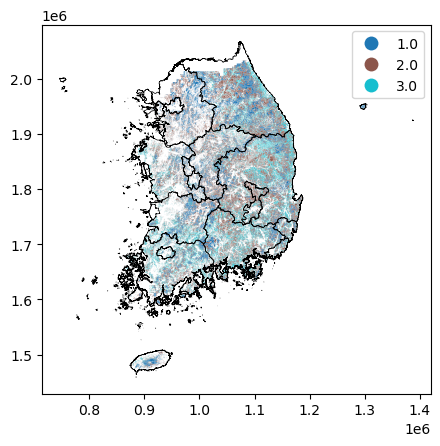

In [19]:
ax = plot_data.plot(column="frtp_CD", categorical=True, legend=True)
bdd.boundary.plot(ax = ax, color = "black", linewidth = 0.5)

In [20]:
plot_data["frtp_CD"].value_counts()

frtp_CD
2.0    104522
3.0    102557
1.0     56526
Name: count, dtype: int64

<Axes: >

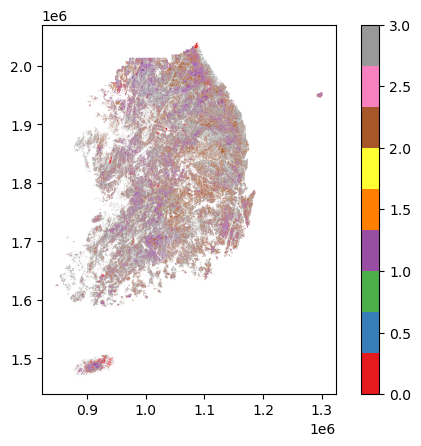

In [ ]:
merged2.plot(color = merged2["frtp_CD"], legend=True)

In [19]:
col_names = list(merged.columns)
del col_names[-1]
for i in col_names:
    print("%s", i)
    print(merged[i].unique())

%s FIFTH_FRTP
['H' 'M' 'PH' 'PR' 'R' 'L' 'B' 'D' 'PK' 'PCa' 'PL' 'PC' 'O' 'PCo' 'PD'
 'PCr' 'LP' 'Q' 'W' 'PT' 'E' 'F']
%s DMCLS_CD
[2 1 0 3]
%s AGCLS_CD
[4 5 3 2 0 1 6 7 8 9]
%s DNST_CD
['B' 'C' None 'A']
%s SMBL_CD
['H2-4B' 'H2-5B' 'H2-5C' 'M1-3B' 'M2-4B' 'M2-4C' 'PH1-2C' 'PR1-3C'
 'PR2-4B' 'PR2-4C' 'R' 'H1-3B' 'H2-4A' 'H2-4C' 'PH1-2B' 'H1-2B' 'H1-3C'
 'L' 'M1-3C' 'B' 'D2-4B' 'D2-5B' 'M2-5B' 'M2-5C' 'H0-1' 'PK1-3C' 'PR1-3B'
 'H1-2A' 'M1-2A' 'M2-4A' 'PCa1-3C' 'PH0-1' 'PH1-3C' 'PK0-1' 'PK1-2B'
 'PK1-2C' 'PL1-3B' 'PH2-3C' 'PH2-4C' 'PR1-2B' 'H1-3A' 'M1-3A' 'PK1-3B'
 'PK2-4B' 'PR2-5C' 'M0-1' 'PCa1-3B' 'D2-4C' 'M1-2B' 'PC0-1' 'PH2-4B'
 'D1-3B' 'D3-6B' 'PH1-3B' 'PK2-3C' 'H3-6B' 'M3-6B' 'PC2-4A' 'H3-6C'
 'D1-3C' 'D2-5A' 'D2-5C' 'M2-5A' 'O' 'PCo1-2C' 'PC1-3C' 'PD1-3A' 'PD1-3B'
 'D1-3A' 'D2-4A' 'PC1-3B' 'PCr1-3B' 'M1-2C' 'M3-6C' 'PC1-2C' 'PC2-4B'
 'PC2-4C' 'PC2-5B' 'PC3-6C' 'PCo1-3C' 'PD1-2C' 'D3-6C' 'H3-7C' 'PC2-5C'
 'PC3-7C' 'PD1-3C' 'PD2-5C' 'PR2-5B' 'PCo1-3B' 'PL1-2C' 'PR1-2C' 'H1-2C'
 'PL1

<Axes: >

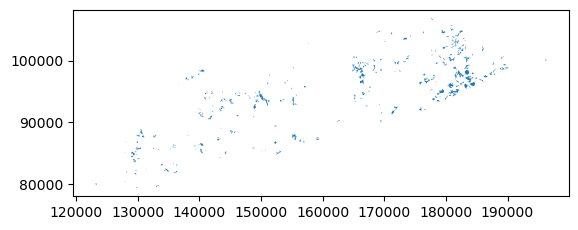

In [23]:
jeju[jeju.FIFTH_FRTP == "O"].plot()